In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KMeans import *

In [2]:
csv = np.genfromtxt("e5.csv", delimiter=',', skip_header=1, dtype=float)
np.random.shuffle(csv)
t_data = csv[:,:]

In [3]:
lr = KMeans(t_data,3)
lr.train(40)
score = lr.silhouette_score()
print(f'score = {score}')

score = 0.6371504578252939


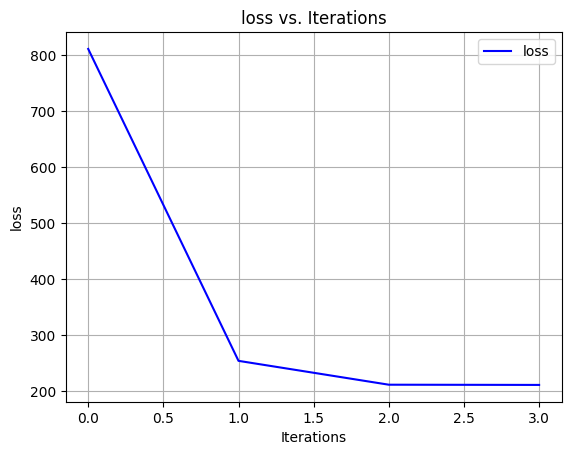

In [4]:
plt.plot(range(len(lr.loss)), lr.loss, label='loss', color='blue')
plt.title('loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend()
plt.grid(True) 
plt.show()

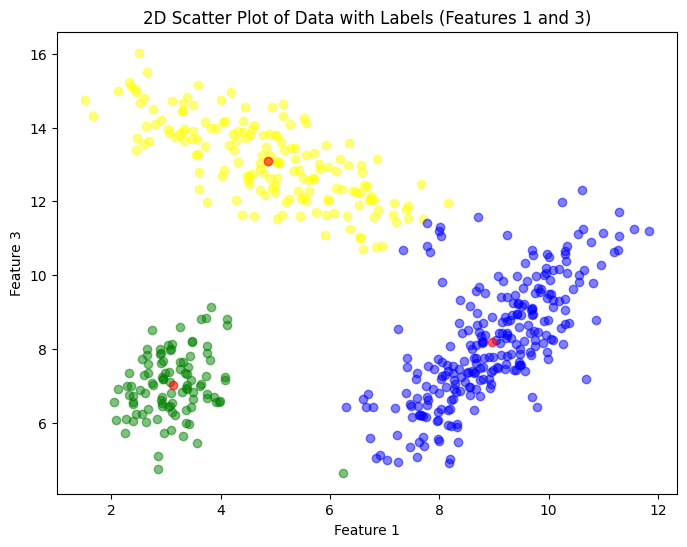

In [5]:
plt.figure(figsize=(8, 6))
t_label = lr.predict(t_data)

colors = ['blue', 'yellow','green']
for i in range(t_data.shape[0]):
    plt.scatter(t_data[i, 0], t_data[i, 1], color=colors[int(t_label[i])], alpha=0.5)


centroids = lr.centroids * lr.std  + lr.mean
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', alpha=0.6)

plt.title('2D Scatter Plot of Data with Labels (Features 1 and 3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.show()



In [6]:
lr.save_model("e5.npz")

In [8]:
lr = KMeans(None)
lr.load_model("e5.npz")